In [22]:
from matplotlib import pyplot as plt
from dataset_delay_predictions import Dataset_Delay_Prediction, Dataset_Delay_Prediction_from_list
from dataset_delay_predictions import DatasetDelayPredictionStackOverflow
import pickle
from math import exp

## Stack Overflow Dataset

In [2]:
dataset_name = 'stack-overflow-dataset'

#load the dataset
pickle_filename = dataset_name.replace('/', '-')
dataset = pickle.load(open(pickle_filename, 'rb'))

In [4]:
#some statistics about the dataset:
number_of_different_events = dataset.number_of_events
print('number of different_events :', str(number_of_different_events))
number_of_sequences = dataset.number_of_users
print('number of users: ', str(number_of_sequences))
average_length_of_seq = sum(dataset.full_seqlen)/number_of_sequences
print('average length: ', average_length_of_seq)
target_values = [value[0] for value in dataset.full_values if value[0] <1]
average_target_value = sum(target_values)/number_of_sequences
print('average_target_value: ', average_target_value)


number of different_events : 22
number of users:  6633
average length:  71.42786069651741
average_target_value:  0.08500138576037816


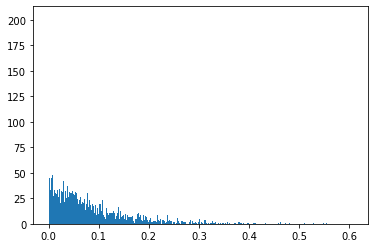

In [5]:
plt.hist(target_values, bins=1000)
plt.show()

In [6]:
target_values_low = [value for value in target_values if value < average_target_value]
target_values_high = [value for value in target_values if value >= average_target_value]


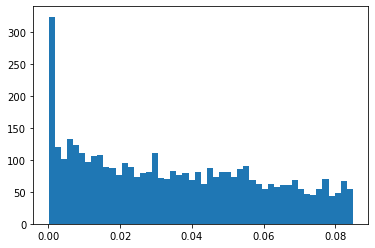

In [7]:
plt.hist(target_values_low, bins=50)
plt.show()

In [8]:
print(sum(target_values_low)/len(target_values_low))

0.034982697021608555


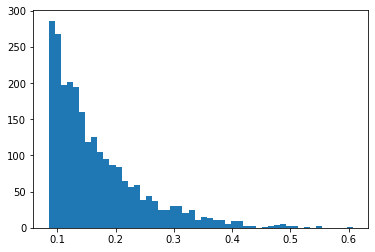

In [9]:
plt.hist(target_values_high, bins=50)
plt.show()

In [10]:
print(sum(target_values_high)/len(target_values_high))

0.1683859790498587


In [11]:
target_values_test = target_values[:dataset.training_set_length]

In [12]:
average_train_value = sum(target_values[dataset.training_set_length:])/len( target_values[dataset.training_set_length:])
pred = [average_train_value for _ in range(dataset.training_set_length)]
mean_sum_of_squares = sum([(target_values_test[i] - pred[i])**2 for i in range(dataset.training_set_length)])/dataset.training_set_length
print(mean_sum_of_squares)

0.00758322750710339


In [13]:
dataset_name = '2019-10_11_12-dataset_delay_prediction'

#load the dataset
pickle_filename = dataset_name.replace('/', '-')
dataset = pickle.load(open(pickle_filename, 'rb'))

In [14]:
#some statistics about the dataset:
number_of_different_events = dataset.number_of_events
print('number of different_events :', str(number_of_different_events))
number_of_sequences = dataset.number_of_users
print('number of users: ', str(number_of_sequences))
average_length_of_seq = sum(dataset.full_seqlen)/number_of_sequences
print('average length: ', average_length_of_seq)
target_values = [val[0] for val in dataset.full_values]
print('average_target_value: ', sum(target_values)/number_of_sequences)

number of different_events : 39
number of users:  5870
average length:  17.359965928449743
average_target_value:  0.41061391864065805


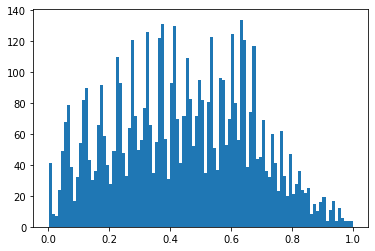

In [15]:
plt.hist(target_values, bins=100)
plt.show()

In [16]:
training_set_length = int(1/5 * 5870)
target_values_test = target_values[:training_set_length]
average_train_value = sum(target_values[training_set_length:])/len( target_values[training_set_length:])
pred = [average_train_value for _ in range(training_set_length)]
mean_sum_of_squares = sum([(target_values_test[i] - pred[i])**2 for i in range(training_set_length)])/training_set_length
print(mean_sum_of_squares)

0.05045743797643716


In [20]:
dataset.constant_C

1350651.0000639954

In [23]:
target_values_exp = [dataset.constant_C * (exp(t) - 1) for t in target_values]

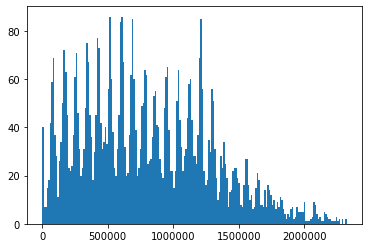

In [26]:
plt.hist(target_values_exp, bins=200)
plt.show()

In [27]:
sequences = dataset.full_features_log_dt

In [34]:
s = sequences[0]
d = len(s[0])
print([e[d-2] for e in s])
print([e[d-1] for e in s])


[0.0, 2.3692278524836256e-08, 3.998071971280496e-08, 3.35467296865793e-06]
[0.0, 0.032, 0.054, 4.531]
